# Sales Analysis


### Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir

## Load Data

### Task 1: Merge the 12 months of sales data into one spreadsheet
- Benefit of doing so:
    - Easier to do our analysis when our spreadsheets are merged into one

### a): Lets first examine the current working directory and pull a single file to see if our data is available

In [3]:
#lets first pull a single file
#./ as we are retrieving a file in our current directory
filename = ("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")
sales = pd.read_csv(filename)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### b): Merge the files into a single list
##### We can do so by using <b>from os import listdir</b> (this will get you everything that's in a directory - files and directories.)

In [4]:
#store filepath in variable
filepath = ('./SalesAnalysis/Sales_Data/')

#Using a list comprehension and os.listdir,
#we create list storing each file
files = [file for file in os.listdir(filepath)]

#simple for loop then iterates through the list
for x in files:
    print(x)


Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


### c): Concatenate these csv files into one using pd.concate( )

In [5]:
months_data = pd.DataFrame()

#Here we iterate over each file, read each file, 
#then add the months_data DF with the current file being iterated over

for x in files:
    #read the file name(file path + the file)
    df = pd.read_csv(filepath+x)
    months_data = pd.concat([months_data,df])
    
#check to ensure it worked
#months_data.head()

#we then use to_csv to name the new dataframe and export to the current directory this notebook is in
#set the index to False, as we dont want our file to have an index
months_data.to_csv("All_Sales_Data.csv", index=False)

#### Read in updated dataframe

In [6]:
all_sales = pd.read_csv("All_Sales_Data.csv")
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### SIDE NOTE to part b) & c) above
##### Alternatively we could have used the module glob if we didnt want to use to_csv and export a concatenated file
- Use glob() to list all the files in a directory that match a pattern and sort the results
- Note the naming structure of the files should match to a certain point
- Mark the dynamic part of the filename with *    
    

In [7]:
from glob import glob

In [8]:

sales_files1 = sorted(glob('./SalesAnalysis/Sales_Data/Sales_*_*.csv'))
sales_files1

['./SalesAnalysis/Sales_Data/Sales_April_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_August_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_December_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_February_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_January_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_July_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_June_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_March_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_May_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_November_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_October_2019.csv',
 './SalesAnalysis/Sales_Data/Sales_September_2019.csv']

- Next, we concatenate all seperate csv files into one using glob,assign() and pd.concat()
- This uses a generator expression to read the files, assign() to create a new column, and concat() to concatenate the files into one DF
- assign() is left out below but can be added by adding <b>pd.read_csv(file).assign(filename=file),..</b> 

In [9]:
pd.concat((pd.read_csv(file)
          for file in sales_files1))

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### SIDE NOTE END

In [10]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Data Cleaning and Preparation
- need to handle potential duplicates, strings in numeric columns, NaN values

#### Drop rows of NaN
##### Options
- could create a new DF with no nan values using dropna()


##### Below selects all null values and assigns them to a new DataFrame

In [11]:
nan_df = all_sales[all_sales.isnull().any(axis=1)]
nan_df[:5]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


##### Now we can use dropna(). This takes the parameter 'how'; Determine if row or column is removed from DataFrame, when we have at least one NA or all NA

In [12]:
#drops all NaN rows given the result above
all_sales = all_sales.dropna(how='all')

<i>Upon dropping NaN values, there was still invalid data causing errors when trying to convert string to int.</i> 
- ValueError: invalid literal for int() with base 10: 'Or'

#### Finding 'Or' and deleting it

In [13]:
#indexing all data based on a certain condition
temp = all_sales[all_sales['Order Date'].str[0:2]=='Or']
temp[:5]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Our issue is that the head of spreadsheet was found across our concatenation. To remove these from all_sales DataFrame, we can change our condition to exclude 'Or'

In [14]:
all_sales = all_sales[all_sales['Order Date'].str[0:2]!='Or']

### Task 2: Add a Month Column

In [15]:
#add the Month column
#this selects the first two values from the 'Order Date' string
all_sales.insert(5, 'Month', (all_sales['Order Date'].str[0:2]))


In [16]:
#we want our month column to handle integers
#having now cleaned our data, the following worked
all_sales['Month'] = all_sales['Month'].astype('int32')
all_sales.sort_values(by='Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
143792,147268,Wired Headphones,1,11.99,01/01/19 03:07,1,"9 Lake St, New York City, NY 10001"
144602,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,1,"760 Church St, San Francisco, CA 94016"
145955,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,1,"735 5th St, New York City, NY 10001"
146609,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,1,"75 Jackson St, Dallas, TX 75001"
145962,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,1,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...,...
1914,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,12,"82 Hill St, Dallas, TX 75001"
2870,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,12,"30 Elm St, San Francisco, CA 94016"
22387,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,12,"743 Adams St, San Francisco, CA 94016"
14778,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,12,"60 Hickory St, Los Angeles, CA 90001"


### Task 3: Add a Sales Column

In [17]:
#convert appropriate columns to numeric values
all_sales['Quantity Ordered'] = all_sales['Quantity Ordered'].astype('int32')
all_sales['Price Each'] = all_sales['Price Each'].astype('float64')

quant_ord = all_sales['Quantity Ordered']
price_each = all_sales['Price Each']
total_sales = quant_ord*price_each
total_sales

0         1700.00
1          600.00
2           11.95
3          149.99
4           11.95
           ...   
186845       2.99
186846     149.99
186847      11.95
186848      11.95
186849       2.99
Length: 185950, dtype: float64

Alternatively, this column could have been calculated by:
- all_data['Sales'] = all_sales['Quantity Ordered']*all_sales['Price Each']

Furthermore, pd.to_numeric() could have been used to convert strings to numerical values

In [18]:
all_sales['Sales'] = total_sales
#rearrange column order
all_sales = all_sales[['Order ID','Product','Quantity Ordered','Price Each','Sales','Order Date','Month','Purchase Address']]
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,12,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,12,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,"43 Hill St, Atlanta, GA 30301"


### Task 4: Add a City Column
- Get_city   
  - Takes the purchase address, applies the function to each row
  - splits on the comma and takes index one from the split.
- get_state
  - Takes the purchase address, applies the function to each row
  - splits on the comma and takes index one from the split.
  - takes this split, splits on the whitespace and takes first element
- lambda x should be used when working with the rows contents


In [19]:
def get_city(f):
    return f.split(', ')[1]

def get_state(f):
    return f.split(', ')[2].split(' ')[0]

all_sales['City'] = all_sales['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")

all_sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,12,"136 Church St, New York City, NY 10001",New York City NY
1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,12,"562 2nd St, New York City, NY 10001",New York City NY
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,"277 Main St, New York City, NY 10001",New York City NY
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,"410 6th St, San Francisco, CA 94016",San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,"43 Hill St, Atlanta, GA 30301",Atlanta GA



## Initial Analysis

### Question 1): What was the best month for sales? How much was earned that month?
- Need to first add 'Month' and 'Sales' column (See Above)
- I initially tried 1): to create a DF with just sales, 2):put the sales in ascending order but the appropriate approach is to use the <b>groupby</b> function on the column Month.


In [20]:
all_sales.sort_values(by='Sales', ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
29834,181069,Macbook Pro Laptop,2,1700.00,3400.00,04/27/19 21:01,4,"668 Park St, San Francisco, CA 94016",San Francisco CA
173613,210292,Macbook Pro Laptop,2,1700.00,3400.00,06/08/19 09:00,6,"953 Ridge St, San Francisco, CA 94016",San Francisco CA
89549,200528,Macbook Pro Laptop,2,1700.00,3400.00,05/13/19 13:40,5,"643 4th St, Boston, MA 02215",Boston MA
30336,181544,Macbook Pro Laptop,2,1700.00,3400.00,04/22/19 12:48,4,"731 11th St, New York City, NY 10001",New York City NY
137282,278637,ThinkPad Laptop,2,999.99,1999.98,10/02/19 16:06,10,"643 Cedar St, Boston, MA 02215",Boston MA
...,...,...,...,...,...,...,...,...,...
92238,203086,AAA Batteries (4-pack),1,2.99,2.99,05/22/19 17:01,5,"567 Meadow St, San Francisco, CA 94016",San Francisco CA
92230,203078,AAA Batteries (4-pack),1,2.99,2.99,05/06/19 11:53,5,"693 Dogwood St, Atlanta, GA 30301",Atlanta GA
92222,203070,AAA Batteries (4-pack),1,2.99,2.99,05/22/19 08:29,5,"451 12th St, Los Angeles, CA 90001",Los Angeles CA
92194,203042,AAA Batteries (4-pack),1,2.99,2.99,05/23/19 13:15,5,"492 Washington St, San Francisco, CA 94016",San Francisco CA


In [21]:
best_month = all_sales.groupby('Month').sum()
best_month = best_month.sort_values(by='Sales', ascending=False)
best_month

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
4,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
5,18667,3.135125e+06,3.152607e+06
3,17005,2.791208e+06,2.807100e+06
7,16072,2.632540e+06,2.647776e+06
6,15253,2.562026e+06,2.577802e+06
8,13448,2.230345e+06,2.244468e+06


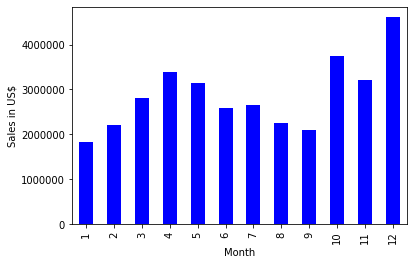

In [22]:
best_month_sales = all_sales.groupby('Month').sum()['Sales']
best_month_sales.plot.bar(color='b')
plt.ylabel('Sales in US$')
plt.show()

#### Answer 1):  December

### Question 2) What US city had the highest number of sales?
- Need to first add a City column

In [23]:
best_city = all_sales.groupby('City').sum()['Sales']
best_city.sort_values(ascending=False) 

City
San Francisco CA    8.262204e+06
Los Angeles CA      5.452571e+06
New York City NY    4.664317e+06
Boston MA           3.661642e+06
Atlanta GA          2.795499e+06
Dallas TX           2.767975e+06
Seattle WA          2.747755e+06
Portland OR         1.870732e+06
Austin TX           1.819582e+06
Portland ME         4.497583e+05
Name: Sales, dtype: float64

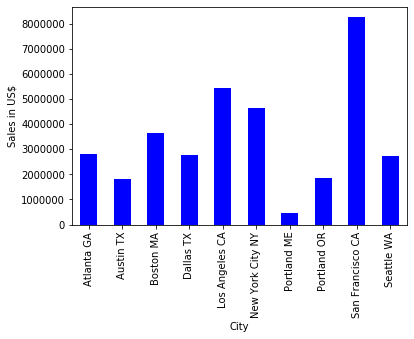

In [25]:
best_city_sales = all_sales.groupby('City').sum()['Sales']
best_city_sales.plot.bar(color='b', fontsize=10)
plt.ylabel('Sales in US$')
plt.show()

#### Answer 2: SF 

### Question 3): What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- what time are people buying their products?
- look at distribution of products over time?


In [27]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12/30/19 00:01,12,"136 Church St, New York City, NY 10001",New York City NY
1,295666,LG Washing Machine,1,600.00,600.00,12/29/19 07:03,12,"562 2nd St, New York City, NY 10001",New York City NY
2,295667,USB-C Charging Cable,1,11.95,11.95,12/12/19 18:21,12,"277 Main St, New York City, NY 10001",New York City NY
3,295668,27in FHD Monitor,1,149.99,149.99,12/22/19 15:13,12,"410 6th St, San Francisco, CA 94016",San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,11.95,12/18/19 12:38,12,"43 Hill St, Atlanta, GA 30301",Atlanta GA


In [28]:
#Convert Order Date to datetime
all_sales['Order Date'] = pd.to_datetime(all_sales['Order Date'])

In [29]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,2019-12-30 00:01:00,12,"136 Church St, New York City, NY 10001",New York City NY
1,295666,LG Washing Machine,1,600.00,600.00,2019-12-29 07:03:00,12,"562 2nd St, New York City, NY 10001",New York City NY
2,295667,USB-C Charging Cable,1,11.95,11.95,2019-12-12 18:21:00,12,"277 Main St, New York City, NY 10001",New York City NY
3,295668,27in FHD Monitor,1,149.99,149.99,2019-12-22 15:13:00,12,"410 6th St, San Francisco, CA 94016",San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,11.95,2019-12-18 12:38:00,12,"43 Hill St, Atlanta, GA 30301",Atlanta GA


In [33]:
#Using .dt.hour on the datetime column 'Order Date'
all_sales['Hour'] = all_sales['Order Date'].dt.hour

hour_sales = all_sales.groupby('Hour').sum()['Quantity Ordered']

hour_sales

Hour
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int32

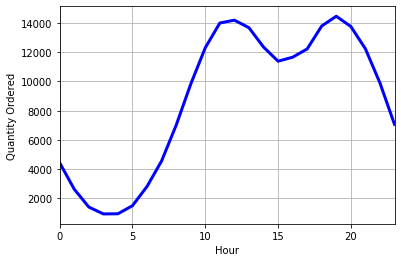

In [32]:
hour_sales.plot.line(color='b',linewidth=3, markersize=15)
plt.ylabel('Quantity Ordered')
plt.grid()
plt.show()

#### Answer 3: Peak hours are midday and 7pm. The hours leading to those would be the best time to advertise.

### Question 4): What products are most often sold together?
- group by time sold at?
- Focus on Order ID
- Break the question down:
    - What rows have duplicate values?
    - Group these duplicate values based on order id and product.
    - Count how many of each pair there is
    
    

In [34]:
#duplicate rows
order_dup = all_sales[all_sales.duplicated(subset='Order ID', keep=False)]
order_dup



,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour
16,295681,Google Phone,1,600.00,600.00,2019-12-25 12:37:00,12,"79 Elm St, Boston, MA 02215",Boston MA,12
17,295681,USB-C Charging Cable,1,11.95,11.95,2019-12-25 12:37:00,12,"79 Elm St, Boston, MA 02215",Boston MA,12
18,295681,Bose SoundSport Headphones,1,99.99,99.99,2019-12-25 12:37:00,12,"79 Elm St, Boston, MA 02215",Boston MA,12
19,295681,Wired Headphones,1,11.99,11.99,2019-12-25 12:37:00,12,"79 Elm St, Boston, MA 02215",Boston MA,12
36,295698,Vareebadd Phone,1,400.00,400.00,2019-12-13 14:32:00,12,"175 1st St, New York City, NY 10001",New York City NY,14
...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,3.84,2019-06-18 11:37:00,6,"990 Walnut St, Los Angeles, CA 90001",Los Angeles CA,11
186822,222884,Google Phone,1,600.00,600.00,2019-06-04 12:06:00,6,"819 Pine St, New York City, NY 10001",New York City NY,12
186823,222884,USB-C Charging Cable,1,11.95,11.95,2019-06-04 12:06:00,6,"819 Pine St, New York City, NY 10001",New York City NY,12
186842,222903,iPhone,1,700.00,700.00,2019-06-07 22:21:00,6,"685 Hickory St, New York City, NY 10001",New York City NY,22


In [35]:
#create new column containing products sold together
#create new column, group the order id's and select only product, use a function to print the products side by side
order_dup['Grouped'] = order_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


#remove duplicate rows 
order_dup = order_dup[['Order ID', 'Grouped']].drop_duplicates()
order_dup.head()

/Users/niallyorke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."


In [36]:
#Count how many of each group there is
#A counter tool is provided to support convenient and rapid tallies
from itertools import combinations
from collections import Counter

count = Counter()

for x in order_dup['Grouped']:
    row_split = x.split(',')
    count.update(Counter(combinations(row_split, 2)))

    
#Pairs
pair = count.most_common(10)
pair_df = pd.DataFrame(pair, columns = ['Product A/B','Count'])
pair_df

,Product A/B,Count
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(Vareebadd Phone, Wired Headphones)",143
8,"( USB-C Charging Cable, Wired Headphones)",120
9,"(Vareebadd Phone, Bose SoundSport Headphones)",80


In [37]:
#Count how many of each group there is
#A counter tool is provided to support convenient and rapid tallies
from itertools import combinations
from collections import Counter

count = Counter()

for x in order_dup['Grouped']:
    row_split = x.split(',')
    count.update(Counter(combinations(row_split, 3)))

#Groups of three    
count.most_common(10)
treble_df = pd.DataFrame(pair, columns = ['Product A/B/C','Count'])
treble_df

,Product A/B/C,Count
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(Vareebadd Phone, Wired Headphones)",143
8,"( USB-C Charging Cable, Wired Headphones)",120
9,"(Vareebadd Phone, Bose SoundSport Headphones)",80


### Question 5): What products sold the most?

In [38]:
total_prod = all_sales.groupby('Product').sum()['Quantity Ordered']
total_prod.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

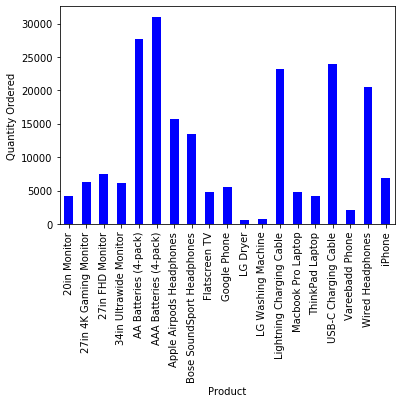

In [41]:
total_prod.plot.bar(color='b',fontsize = 10)
plt.ylabel('Quantity Ordered')
plt.show()